In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np

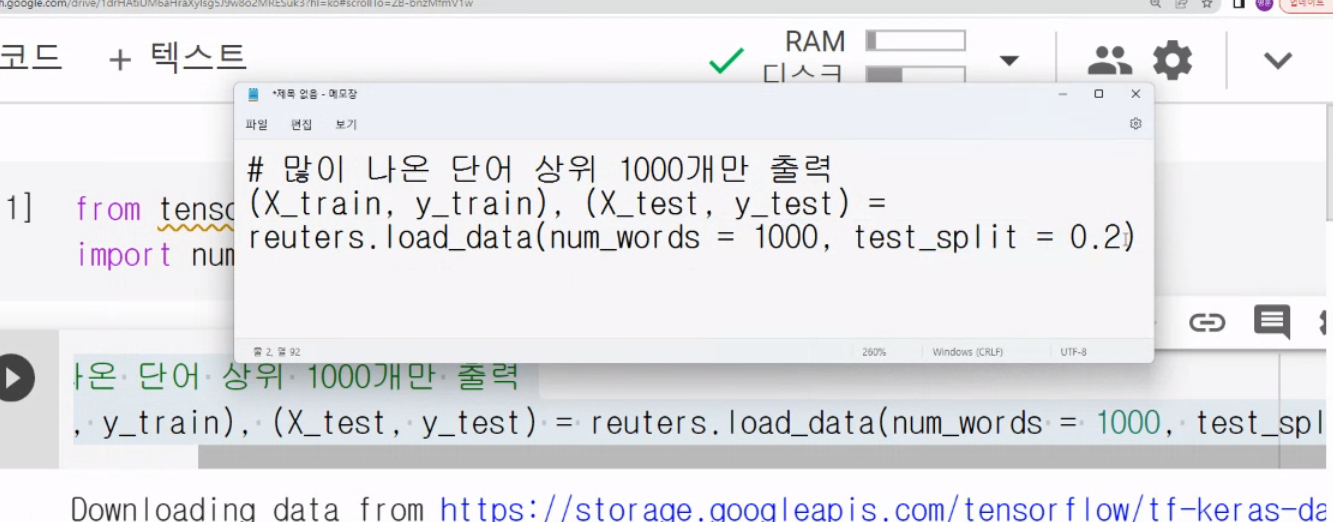

In [2]:
#많이 나온 단어 상위 1000개만 출력
(X_train, y_train),(X_test,y_test)= reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key

550378/550378 [==============================] - 0s 0us/step


In [4]:
index_to_word[4]

'in'

In [5]:
# 46가지로 뉴스를 분류
np.max(y_train)

45

In [6]:
#뉴스마다 길이가 다름
len(X_train[3])

224

In [7]:
#가장 길이가 긴 뉴스의 길이 
print(max(len(i) for i in X_train))

2376


In [8]:
#뉴스의 평균 길이 
print(sum(map(len, X_train))/len(X_train))

145.5398574927633


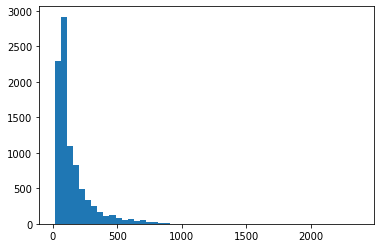

In [9]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_train], bins=50)
plt.show()

In [10]:
# 한뉴스의 단어를 145로 맞춰줌 

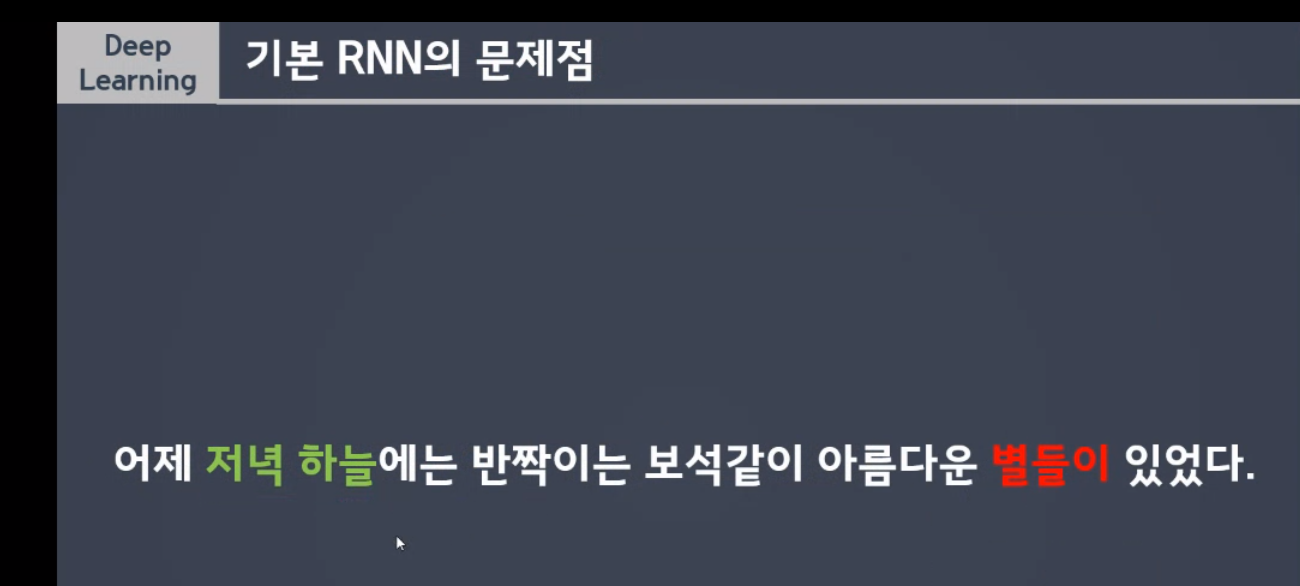

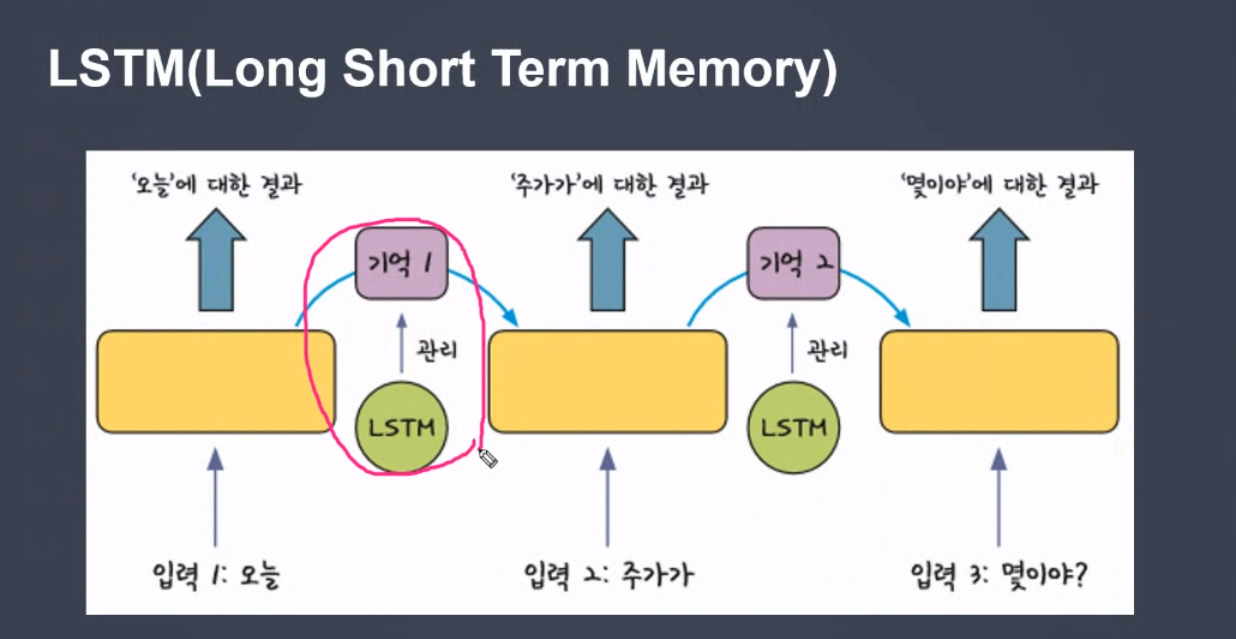

In [11]:
# 한뉴스의 단어를 145로 맞춰줌 
from tensorflow.keras.preprocessing import sequence


In [12]:
X_train=sequence.pad_sequences(X_train, maxlen=145)
X_test=sequence.pad_sequences(X_test,maxlen=145)

In [13]:
X_train.shape,X_test.shape

((8982, 145), (2246, 145))

In [14]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   2,   2,   8,  43,  10, 447,
         5,  25, 207, 270,   5,   2, 111,  16, 369, 186,  90,  67,   7,
        89,   5,  19, 102,   6,  19, 124,  15,  90,  67,  84,  22, 482,
        26,   7,  48,   4,  49,   8, 864,  39, 209, 154,   6, 151,   6,
        83,  11,  15,  22, 155,  11,  15,   7,  48,   9,   2,   2, 504,
         6, 258,   6, 272,  11,  15,  22, 134,  44,  11,  15,  16,   8,
       197,   2,  90,  67,  52,  29, 209,  30,  32, 132,   6, 109,  15,
        17,  12], dtype=int32)

In [15]:
# y데이터 원핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)



In [16]:
y_train.shape

(8982, 46)

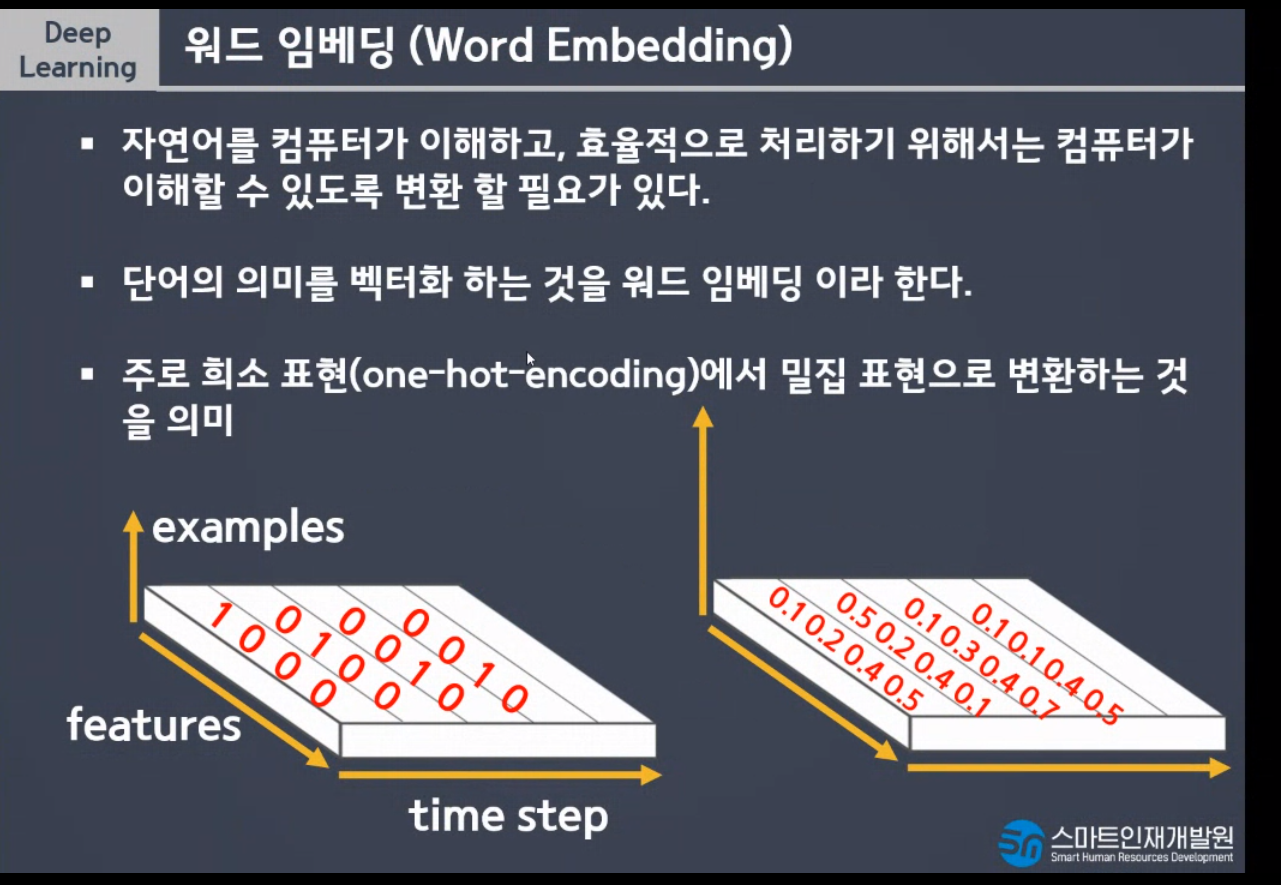

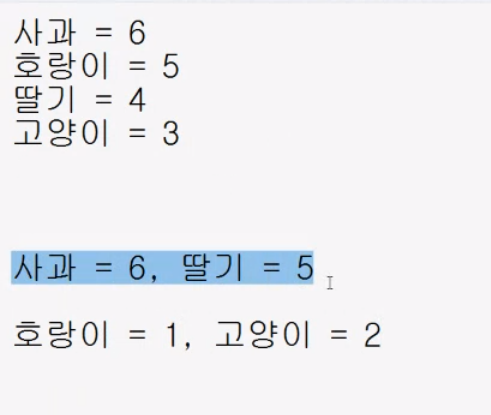

In [24]:
# LSTM 모델 만들기 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense,SimpleRNN


In [18]:
model1=Sequential()

# 단어를 희소표현에서 밀집표현으로 변경 =워드임베딩 
model1.add(Embedding(1000,145))# 사용된 단어의 개수 (1000), 기사당 단어수(145)
model1.add(LSTM(100,activation='tanh'))
model1.add(Dense(46,activation='softmax'))

In [19]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model1.fit(X_train,y_train,epochs=50)

Epoch 1/50
281/281 [==============================] - 9s 10ms/step - loss: 2.2138 - accuracy: 0.4303
Epoch 2/50
281/281 [==============================] - 3s 9ms/step - loss: 1.7654 - accuracy: 0.5466
Epoch 3/50
281/281 [==============================] - 3s 11ms/step - loss: 1.6256 - accuracy: 0.5838
Epoch 4/50
281/281 [==============================] - 4s 13ms/step - loss: 1.4249 - accuracy: 0.6359
Epoch 5/50
281/281 [==============================] - 5s 17ms/step - loss: 1.3073 - accuracy: 0.6650
Epoch 6/50
281/281 [==============================] - 5s 16ms/step - loss: 1.1966 - accuracy: 0.6992
Epoch 7/50
281/281 [==============================] - 3s 10ms/step - loss: 1.1093 - accuracy: 0.7197
Epoch 8/50
281/281 [==============================] - 3s 9ms/step - loss: 1.0197 - accuracy: 0.7455
Epoch 9/50
281/281 [==============================] - 3s 10ms/step - loss: 0.9450 - accuracy: 0.7615
Epoch 10/50
281/281 [==============================] - 3s 10ms/step - loss: 0.8784 - accuracy

## 두번째 모델 만들어보고 비교해보기

In [25]:
model2 = Sequential()
# 단어를 희소표현에서 밀집표현으로 변경 = 워드임베딩
model2.add(Embedding(1000,145)) # 사용된 단어의 갯수(1000), 기사당 단어수(145)
model2.add(SimpleRNN(100,input_shape=(1000,145), activation = 'tanh'))
model2.add(Dense(46, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])
model2.fit(X_train,y_train, epochs = 20)

Epoch 1/20
281/281 [==============================] - 38s 132ms/step - loss: 2.3430 - accuracy: 0.3793
Epoch 2/20
281/281 [==============================] - 38s 136ms/step - loss: 2.0340 - accuracy: 0.4733
Epoch 3/20
281/281 [==============================] - 39s 138ms/step - loss: 1.7899 - accuracy: 0.5468
Epoch 4/20
281/281 [==============================] - 37s 131ms/step - loss: 1.5930 - accuracy: 0.5871
Epoch 5/20
281/281 [==============================] - 38s 135ms/step - loss: 1.3675 - accuracy: 0.6466
Epoch 6/20
281/281 [==============================] - 37s 130ms/step - loss: 1.2598 - accuracy: 0.6794
Epoch 7/20
281/281 [==============================] - 37s 131ms/step - loss: 1.2799 - accuracy: 0.6664
Epoch 8/20
281/281 [==============================] - 37s 131ms/step - loss: 0.9937 - accuracy: 0.7442
Epoch 9/20
281/281 [==============================] - 38s 133ms/step - loss: 0.8305 - accuracy: 0.7822
Epoch 10/20
281/281 [==============================] - 37s 133ms/step - l

In [27]:
# tanh의 한계로 뒤에 있는 말들이 더 기억이 많이됨 
# Attention 중간중간 가중치를 계산하고 문맥에 중심단어에 높은 가중치를 부여 
!pip install attention
from attention import Attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
model3 = Sequential()
# 단어를 희소표현에서 밀집표현으로 변경 = 워드임베딩
model3.add(Embedding(1000,145)) # 사용된 단어의 갯수(1000), 기사당 단어수(145)
model3.add(LSTM(100, activation = 'tanh', return_sequences = True))
model3.add(Attention())
model3.add(Dense(46, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])
model3.fit(X_train,y_train, epochs = 20)

Epoch 1/20
281/281 [==============================] - 5s 11ms/step - loss: 1.9201 - accuracy: 0.4967
Epoch 2/20
281/281 [==============================] - 3s 11ms/step - loss: 1.3619 - accuracy: 0.6604
Epoch 3/20
281/281 [==============================] - 3s 10ms/step - loss: 1.1197 - accuracy: 0.7200
Epoch 4/20
281/281 [==============================] - 3s 10ms/step - loss: 0.9713 - accuracy: 0.7586
Epoch 5/20
281/281 [==============================] - 3s 11ms/step - loss: 0.8655 - accuracy: 0.7841
Epoch 6/20
281/281 [==============================] - 3s 10ms/step - loss: 0.7918 - accuracy: 0.7986
Epoch 7/20
281/281 [==============================] - 3s 10ms/step - loss: 0.7169 - accuracy: 0.8164
Epoch 8/20
281/281 [==============================] - 3s 10ms/step - loss: 0.6652 - accuracy: 0.8290
Epoch 9/20
281/281 [==============================] - 3s 10ms/step - loss: 0.6128 - accuracy: 0.8456
Epoch 10/20
281/281 [==============================] - 3s 11ms/step - loss: 0.5651 - accura